### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [1]:
import numpy as np
import pandas as pd
import os

data = pd.read_csv(os.path.dirname(os.path.dirname(os.getcwd())) + '/' +'processed_data_with_new_features.csv', index_col='id')

In [2]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [3]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here
data.passenger_count.isna().sum(), data.distance_km.isna().sum()

(145864, 145864)

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [4]:
data.passenger_count.value_counts()


930.399753     930354
1005.458335    189262
1070.232174     70348
1028.236276     53751
1061.355223     43460
1053.529749     25543
1718.433333        57
19.666667           3
560.000000          1
104.000000          1
Name: passenger_count, dtype: int64

In [5]:
### Your code is here
data['passenger_count'] = data.passenger_count.fillna(data.passenger_count.value_counts().index[0])

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [6]:
### Your code is here
fills = data.groupby(['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'])['distance_km'].transform('mean')
data['distance_km'] = data['distance_km'].fillna(fills)


In [7]:
### Убедимся, что пропусков не осталось

### Your code is here
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 41 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  float64
 2   store_and_fwd_flag  1458644 non-null  int64  
 3   distance_km         1458644 non-null  float64
 4   log_trip_duration   1458644 non-null  float64
 5   anomaly             1458644 non-null  int64  
 6   traffic_jam         1458644 non-null  int64  
 7   day_of_week_1       1458644 non-null  int64  
 8   day_of_week_2       1458644 non-null  int64  
 9   day_of_week_3       1458644 non-null  int64  
 10  day_of_week_4       1458644 non-null  int64  
 11  day_of_week_5       1458644 non-null  int64  
 12  day_of_week_6       1458644 non-null  int64  
 13  hour_1              1458644 non-null  int64  
 14  hour_2              1458644 non-null  int64  
 15  hour_3    

In [8]:
# Задание 7

data.head(20).to_csv('8_7.csv', sep=';', index=False)

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [9]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

### Your code is here
X = data.drop('log_trip_duration', axis=1)
Y = data['log_trip_duration']
model = LinearRegression()

cross_val_error = np.mean(cross_validate(model, X, Y, scoring='neg_mean_squared_error', cv=selector)['test_score'])

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: -0.431


In [10]:
cross_val_error

-0.4309125167796151

In [11]:
import sklearn
sklearn.metrics.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

(array([2.10000e+02, 6.35000e+02, 6.94000e+02, 9.43000e+02, 1.16600e+03,
        1.74500e+03, 2.73100e+03, 8.00700e+03, 2.95280e+04, 9.43640e+04,
        2.13592e+05, 3.35914e+05, 3.67176e+05, 2.58218e+05, 1.07708e+05,
        2.96150e+04, 4.11800e+03, 1.72000e+02, 3.60000e+01, 3.80000e+01,
        4.90000e+01, 6.40000e+01, 1.91700e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([ 0.69314718,  1.17256744,  1.6519877 ,  2.13140795,  2.61082821,
         3.09024847,  3.56966872,  4.04908898,  4.52850924,  5.0079295 ,
         5.48734975,  5.96677001,  6.44619027,  6.92561053,  7.40503078,
         7.88445104,  8.3638713 ,  8.84329155,  9.32271181,  9.80213207,
        10.28155233, 10.76097258, 11.24039284, 11.7198131 , 12.19923336,
        12.67865361, 13.15807387, 13.63749413, 14.11691439, 14.59633464,
        15.0757549 ]),
 <BarContainer object of 30 artists>)

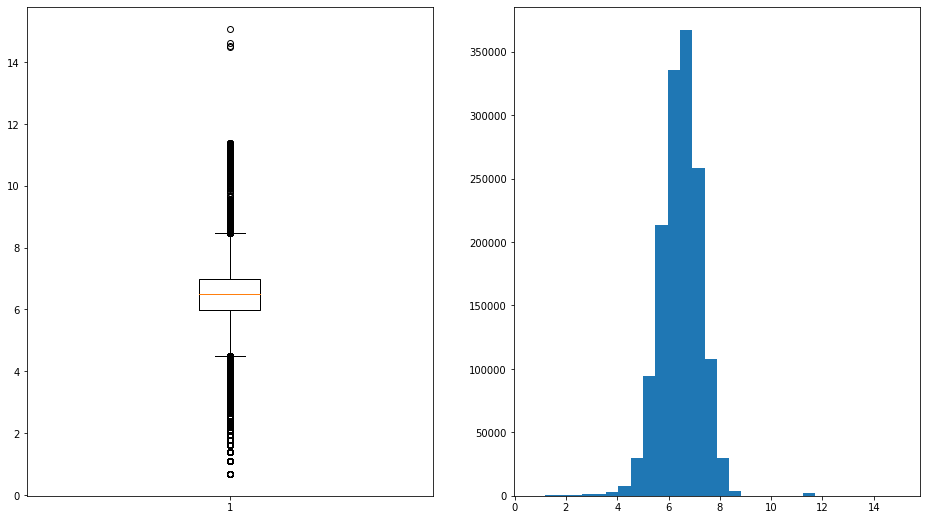

In [14]:
import matplotlib.pyplot as plt

### Your code is here

fig = plt.figure()
fig.set_size_inches(16,9)

fig.add_subplot(1, 2, 1)
plt.boxplot(Y)

fig.add_subplot(1, 2, 2)
plt.hist(Y, bins=30)

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

[топ 99,5% значение;   топ 0,5% значение]

In [15]:
### Your code is here
data_cleared = data[(data['log_trip_duration'] < data.log_trip_duration.quantile(0.995)) 
            & (data['log_trip_duration'] > data.log_trip_duration.quantile(0.005))]

Снова замерьте качество на кросс-валидации, используя старый selector

In [17]:
### Your code is here
X_c = data_cleared.drop('log_trip_duration', axis=1)
Y_c = data_cleared['log_trip_duration']

In [18]:
cross_val_error = np.mean(cross_validate(model, X_c, Y_c, scoring='neg_mean_squared_error', cv=selector)['test_score'])

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: -0.35
